In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

data_superstore = pd.read_excel('DQMall_Update.xlsx')
data_superstore.tail(2)

,Order_ID,Customer_ID,Postal_Code,Product_ID,Sales,Quantity,Discount,Profit,Category,Sub_Category,...,Ship_Mode,Customer_Name,Segment,Country,City,State,Region,New_Order_Date,New_Ship_Date,Order_To_Ship_Duration
498,CA-2018-120810,TH-21550,10009,OFF-AP-10002892,68.94,3,0.0,20.6820,Office Supplies,Appliances,...,Standard Class,Tracy Hopkins,Home Office,United States,New York City,New York,East,23-July-2018,27-July-2018,4
499,CA-2018-124933,DF-13135,10009,OFF-PA-10003302,212.64,6,0.0,99.9408,Office Supplies,Paper,...,Second Class,David Flashing,Consumer,United States,New York City,New York,East,26-December-2018,30-December-2018,4


# Bagian Baru

In [ ]:
data_superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                500 non-null    object 
 1   Customer_ID             500 non-null    object 
 2   Postal_Code             500 non-null    int64  
 3   Product_ID              500 non-null    object 
 4   Sales                   500 non-null    float64
 5   Quantity                500 non-null    int64  
 6   Discount                500 non-null    float64
 7   Profit                  500 non-null    float64
 8   Category                500 non-null    object 
 9   Sub_Category            500 non-null    object 
 10  Product_Name            500 non-null    object 
 11  Ship_Mode               500 non-null    object 
 12  Customer_Name           500 non-null    object 
 13  Segment                 500 non-null    object 
 14  Country                 500 non-null    ob

Kali ini saya akan mengubah kolom New_Order_Date jadi type datetime

In [ ]:
# persentasi total profit dan total sales  (New_Order_Date) tahun 2020
data_superstore['New_Order_Date'] = pd.to_datetime(data_superstore['New_Order_Date'],errors='coerce')

**1.analisis total sales berdasarkan category dan region**

In [ ]:
# analisis total sales berdasarkan category dan region
sales = pd.pivot_table(
    data= data_superstore,
    index=['Region','Category'],
    values='Sales',
    aggfunc='sum'
).reset_index()


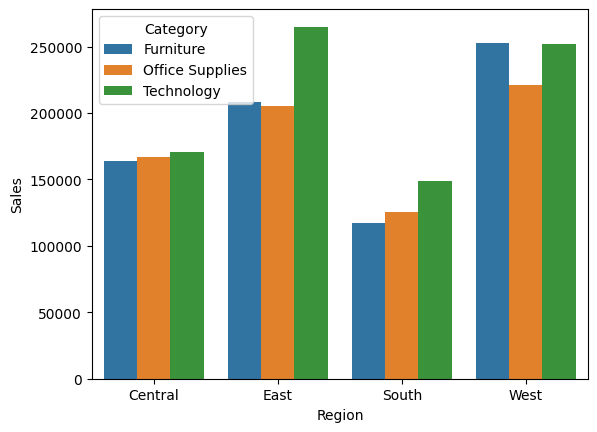

In [ ]:
sns.barplot(
    data= sales,
    x='Region',
    y='Sales',
    hue= 'Category',
)

plt.show()

**2 provit per region**

In [ ]:
#2 provit per region dari yang terbesar
profit_region =
data_superstore.groupby(['Region']).agg(
    Total_Profit = ('Profit','sum')).reset_index()

In [ ]:
fig = px.bar(
    profit_region,
    x='Region',
    y='Total_Profit',
    color='Region'
)

fig.show()


**3 Persentase rata rata lama pengiriman berdasarkan ship mode**

In [ ]:
filtered_data = data_superstore[data_superstore['Ship_Mode'] != 'Same Day']
Avg_ShipMode = filtered_data.groupby(['Ship_Mode']).agg(
    Average=('Order_To_Ship_Duration', 'mean')).reset_index()
display(Avg_ShipMode)

,Ship_Mode,Average
0,First Class,2.220779
1,Second Class,3.071429
2,Standard Class,4.968531


In [ ]:
#visualisasi
import plotly.express as px
fig = px.pie(
    values = Avg_ShipMode['Average'],
    names = Avg_ShipMode['Ship_Mode'],
    color_discrete_sequence = ['#9ACD32', '#E0ECE4'],
    hole = 0.65
)

# Atur luas grafik, hapus legend dan beri judul
fig.update_layout(
    width = 800,
    height = 600,
    showlegend = True,
    margin = dict(l=160, r=200, t=100, b=30),
    title = dict(
        text = "<b>Proporsi lama pengiriman berdasarkan ship mode  </b><br><sup> berdasarkan data yang sajikan pelanggan dengan standard class lebih lama dalam pengirimannya</b></sup>",
        font = dict(
            size = 20,
            color = '#757882'
        ),
        y = 0.92
    )
)


display(fig)

**4 persentase rata-rata profit tahun 2020 untuk category**

In [ ]:
filter_tahun = data_superstore[data_superstore['New_Order_Date'].dt.year == 2020]
profit_2020 = filter_tahun.groupby(['Category']).agg(
    Average1=('Profit','mean')).reset_index()


In [ ]:
#visualisasi
import plotly.express as px
fig = px.pie(
    values = profit_2020['Average1'],
    names =  profit_2020['Category'],
   color_discrete_sequence = ['#87CEEB', '#B0E0E6'],
    hole = 0.65
)

# Atur luas grafik, hapus legend dan beri judul
fig.update_layout(
    width = 800,
    height = 600,
    showlegend = True,
    margin = dict(l=160, r=200, t=100, b=30),
    title = dict(
        text = "<b>Proporsi Rata-rata total profit per category tahun 2020  </b><br><sup> berdasarkan data yang sajikan profit terbesar ada pada category Technology</b></sup>",
        font = dict(
            size = 20,
            color = '#757882'
        ),
        y = 0.92
    )
)


display(fig)

**5 persentase rata-rata  sales (New_Order_Date) tahun 2020**

In [ ]:
filter_tahun2020 = data_superstore[data_superstore['New_Order_Date'].dt.year == 2020]
sales_category = filter_tahun2020.groupby(['Category']).agg(Average2=('Sales','mean')).reset_index()

In [ ]:
#visualisasi
import plotly.express as px
fig = px.pie(
    values = sales_category['Average2'],
    names =  sales_category['Category'],
    color_discrete_sequence = ['#87CEEB', '#B0E0E6'],
    hole = 0.65
)

# Atur luas grafik, hapus legend dan beri judul
fig.update_layout(
    width = 800,
    height = 600,
    showlegend = True,
    margin = dict(l=160, r=200, t=100, b=30),
    title = dict(
        text = "<b> Proporsi Rata-rata Total Sales Tahun 2020 per Category </b><br><sup> berdasarkan data yang sajikan Furniture memiliki rata-rata sales terbanyak </b></sup>",
        font = dict(
            size = 20,
            color = '#757882'
        ),
        y = 0.92
    )
)


display(fig)

**6.Kota dengan sales paling sedikit**

In [ ]:
# Mencari rata-rata dari quantity product yang terjual
data_superstore.agg(Jumlah_Pembelian =('Sales','mean'))

,Sales
Jumlah_Pembelian,256.458746


In [ ]:
# memfilter City dengan quantity >4

In [ ]:
# jumlah quantity per city
avg_city = data_superstore.groupby(['City']).agg(Total_Sales =('Sales','mean'))
filter_city = filtered_city = avg_city.query("Total_Sales < 256.46")
sort_city = filter_city.sort_values(by='Total_Sales', ascending=True,)
city_10 = sort_city.tail(10).reset_index()

In [ ]:
import plotly.express as px

city_10['Color'] = 'Other'
city_10.loc[:2, 'Color'] = 'Bottom'

fig = px.bar(
    city_10,
    x = 'Total_Sales',
    y = 'City',
    orientation = 'h',
    color = 'Color',
    color_discrete_map = {
        'Bottom': '#FF6D60',
        'Other': '#87CEEB'
    },
    text_auto = True
)

fig.update_layout(
    width = 1200,
    height = 600,
    title = '<b>Kota Dengan Total Sales Produk Di Bawah Rata-Rata Sales Keseluruhan </b>',
    xaxis_title = '',
    yaxis_title = '',
    showlegend = False,
    paper_bgcolor = 'rgb(255, 255, 255, 1)',
    plot_bgcolor = 'rgb(255, 255, 255, 0)',
)


fig.show()

7. Produk dengan profit terendah dari rata rata


In [ ]:
# rata rata profit
data_superstore.agg(Rata_rata_Profit = ('Profit','mean'))

In [ ]:
# agegasi dan kelompokkan
total_city = data_superstore.groupby(['City']).agg(Total_Profit = ('Profit','mean'))
avg_city1 = total_city.sort_values(by='Total_Profit',ascending=True)
avg_city2 = avg_city1.query("Total_Profit < 70")
vis_city3 = avg_city2.tail(10).reset_index()

In [ ]:
#visualisasi
import plotly.express as px

vis_city3['Color'] = 'Other'
vis_city3.loc[:2, 'Color'] = 'Bottom'

fig = px.bar(
    vis_city3,
    x = 'Total_Profit',
    y = 'City',
    orientation = 'h',
    color = 'Color',
    color_discrete_map = {
        'Bottom': '#FF6D60',
        'Other': '#87CEEB'
    },
    text_auto = True
)

fig.update_layout(
    width = 1200,
    height = 600,
    title = '<b>Kota Dengan Profit Di Bawah Rata-Rata Keseluruhan </b>',
    xaxis_title = 'Rata-Rata Profit',
    yaxis_title = 'City',
    showlegend = False,
    paper_bgcolor = 'rgb(255, 255, 255, 1)',
    plot_bgcolor = 'rgb(255, 255, 255, 0)',
)


fig.show()